In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

housing_numeric = pd.read_pickle("housing_numeric.pkl")
housing_factor = pd.read_pickle("housing_factor.pkl")
housing_factor = housing_factor.apply(label_encoder.fit_transform)
housing_combined = pd.concat([housing_numeric, housing_factor], axis=1)
housing_combined = housing_combined.apply(label_encoder.fit_transform)
housing_combined  = housing_combined.drop(['PID', 'SalePrice'], axis=1)
housing_combined

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,70,45,459,0,120,0,519,251,189,0,...,5,3,5,5,1,3,4,1,9,4
2,197,18,134,108,367,133,64,404,362,0,...,1,0,5,5,1,3,4,1,9,4
3,160,36,237,0,514,0,61,234,319,0,...,5,3,5,4,0,3,4,1,9,4
4,188,57,511,0,0,0,336,26,87,24,...,5,3,5,5,0,3,4,1,9,4
5,704,47,563,0,437,0,119,211,152,340,...,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,132,45,663,0,0,0,760,322,273,0,...,5,3,1,4,1,3,4,1,9,4
760,756,45,1463,0,0,0,0,0,886,0,...,1,3,5,5,1,3,4,1,9,4
761,928,59,250,0,156,0,592,364,319,435,...,0,3,5,5,1,3,4,1,9,4
762,826,45,655,103,596,0,101,351,304,341,...,1,0,5,5,1,3,4,1,9,4


In [2]:
SalePrice = housing_numeric['SalePrice']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(housing_combined, SalePrice, test_size=0.2, random_state=42)

In [4]:
def get_error(X_train, y_train, X_test, y_test, model, show = True):
    model.fit(X_train, y_train)
    train_error = 1 - model.score(X_train, y_train)
    test_error  = 1 - model.score(X_test, y_test)
    if show:
        print("The training error is: %.5f" %train_error)
        print("The test     error is: %.5f" %test_error)
    return [train_error, test_error]

In [5]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
get_error(X_train,y_train,X_test,y_test,tree_model)

The training error is: 0.00048
The test     error is: 0.98643


[0.0004844961240310086, 0.9864341085271318]

In [6]:
grid_para_tree = [
    {'max_depth': range(1, 31)}
]

tree_model.set_params(random_state=0)
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)

grid_search_tree.fit(X_train, y_train)

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid=[{'max_depth': range(1, 31)}], return_train_score=True,
             scoring='accuracy')

In [7]:
test_error_range  = [1 - x for x in grid_search_tree.cv_results_['mean_test_score']]
train_error_range = [1 - x for x in grid_search_tree.cv_results_['mean_train_score']]

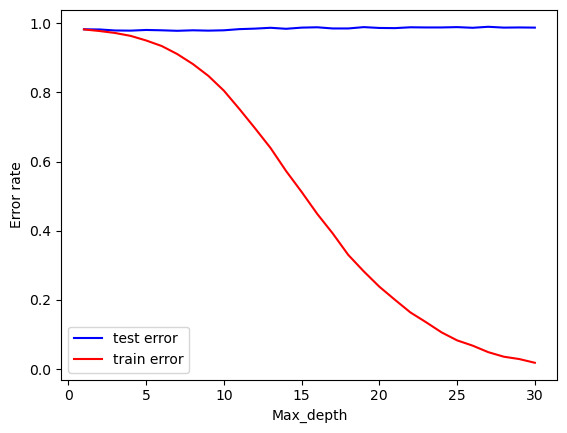

In [8]:
plt.plot(range(1,31), test_error_range,
        c='blue', label='test error')
plt.plot(range(1,31), train_error_range,
        c='red', label='train error')
plt.xlabel('Max_depth')
plt.ylabel('Error rate')
plt.legend()
plt.show()

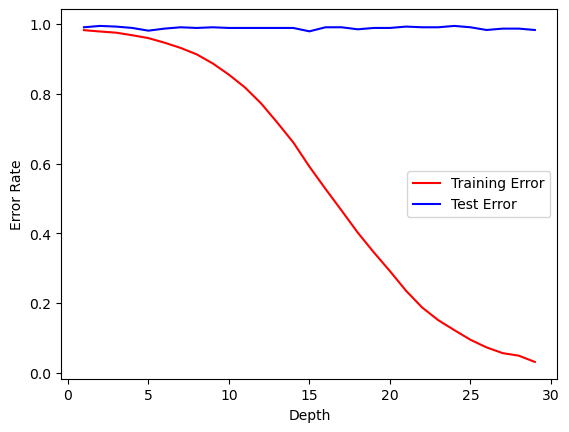

In [9]:
depth  = range(1, 30)
tree_train = []
tree_test = []
for i in depth:
    tree_model.set_params(max_depth = i)
    error = get_error(X_train, y_train, X_test, y_test, tree_model, show=False)
    tree_train.append(error[0])
    tree_test.append(error[1])


plt.plot(depth, tree_train, c = 'red', label='Training Error')
plt.plot(depth, tree_test, c = 'blue', label='Test Error')
plt.xlabel('Depth')
plt.ylabel('Error Rate')
plt.legend(loc=7)

In [10]:
grid_search_tree.best_estimator_
grid_search_tree.best_score_ 
grid_search_tree.best_params_

{'max_depth': 7}

In [11]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}
grid_search_tree = ms.GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy').fit(X_train, y_train)
print('The best score is %.4f' %grid_search_tree.best_score_)
print('The training error is %.4f' %(1 - grid_search_tree.best_estimator_.score(X_train, y_train)))
print('The testing error is %.4f' %(1 - grid_search_tree.best_estimator_.score(X_test, y_test)))

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


The best score is 0.0218
The training error is 0.9312
The testing error is 0.9903


In [12]:
print('Best parameters: '+ str(grid_search_tree.best_params_))

Best parameters: {'criterion': 'gini', 'max_depth': 7}


In [13]:
tree_final = grid_search_tree.best_estimator_
feature_importance = pd.Series(tree_final.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_importance

BsmtUnfSF       0.096887
FullBath        0.070575
1stFlrSF        0.064136
TotalBsmtSF     0.056193
OverallQual     0.044235
                  ...   
RoofMatl        0.000000
BsmtFullBath    0.000000
Exterior2nd     0.000000
MiscVal         0.000000
Utilities       0.000000
Length: 79, dtype: float64

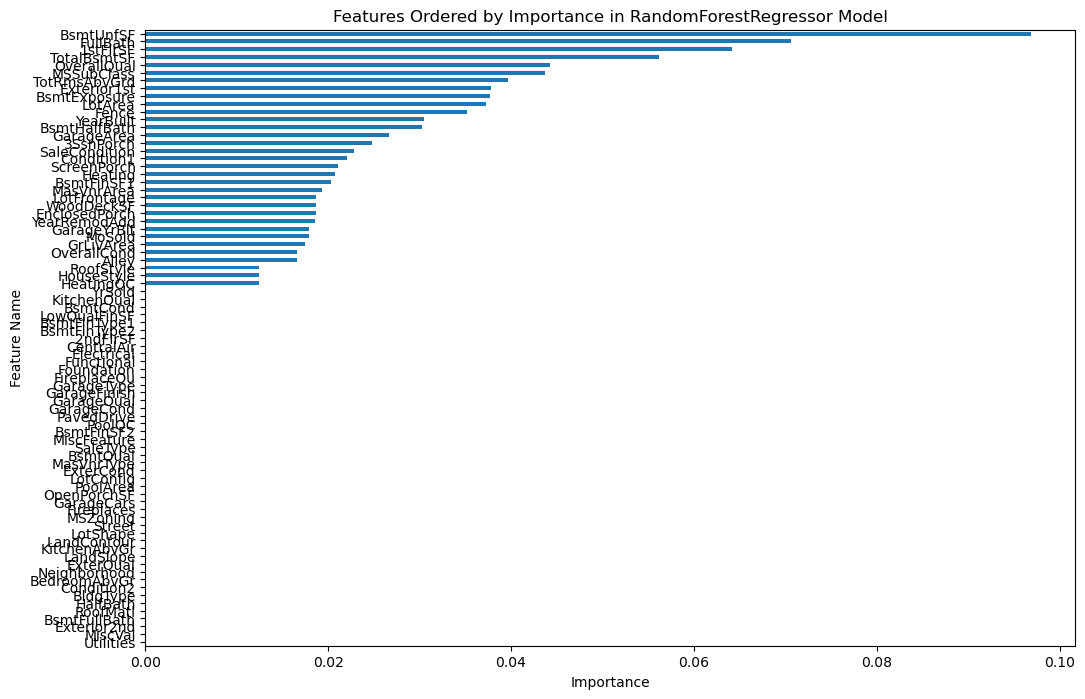

In [14]:
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title(f'Features Ordered by Importance in RandomForestRegressor Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis() 

In [15]:
from sklearn import ensemble 
randomForest = ensemble.RandomForestClassifier()
randomForest.set_params(random_state=0)

randomForest.fit(X_train, y_train) 

print("The training error is: %.5f" % (1 - randomForest.score(X_train, y_train))) 
print("The test     error is: %.5f" % (1 - randomForest.score(X_test, y_test)))

The training error is: 0.00048
The test     error is: 0.97868


In [16]:
grid_para_forest = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(10, 110, 10)
}


In [17]:
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

C:\Users\immed\Programming\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CPU times: total: 6.09 s
Wall time: 29min 59s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 31),
                         'n_estimators': range(10, 110, 10)},
             scoring='accuracy')

In [18]:
grid_search_forest.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 70}

In [19]:
grid_search_forest.best_score_

0.029070970168551213

In [20]:
print("The training error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.best_estimator_.score(X_test, y_test)))

The training error is: 0.14826
The test     error is: 0.98643


In [21]:
best_estimator = grid_search_forest.best_estimator_
feature_importance = pd.Series(best_estimator.feature_importances_, index= X_train.columns).sort_values(ascending=False).head(25)
feature_importance

GrLivArea       0.063676
YearBuilt       0.058828
GarageArea      0.055437
1stFlrSF        0.052825
LotArea         0.046317
TotalBsmtSF     0.046226
OverallQual     0.040859
GarageYrBlt     0.037424
BsmtFinSF1      0.034307
LotFrontage     0.033392
OpenPorchSF     0.030727
YearRemodAdd    0.030545
FullBath        0.028899
BsmtUnfSF       0.027139
2ndFlrSF        0.022713
WoodDeckSF      0.021319
MasVnrArea      0.021264
Neighborhood    0.020648
BsmtQual        0.019667
GarageFinish    0.018418
Fireplaces      0.017137
KitchenQual     0.016927
MoSold          0.016687
GarageCars      0.016332
TotRmsAbvGrd    0.015914
dtype: float64

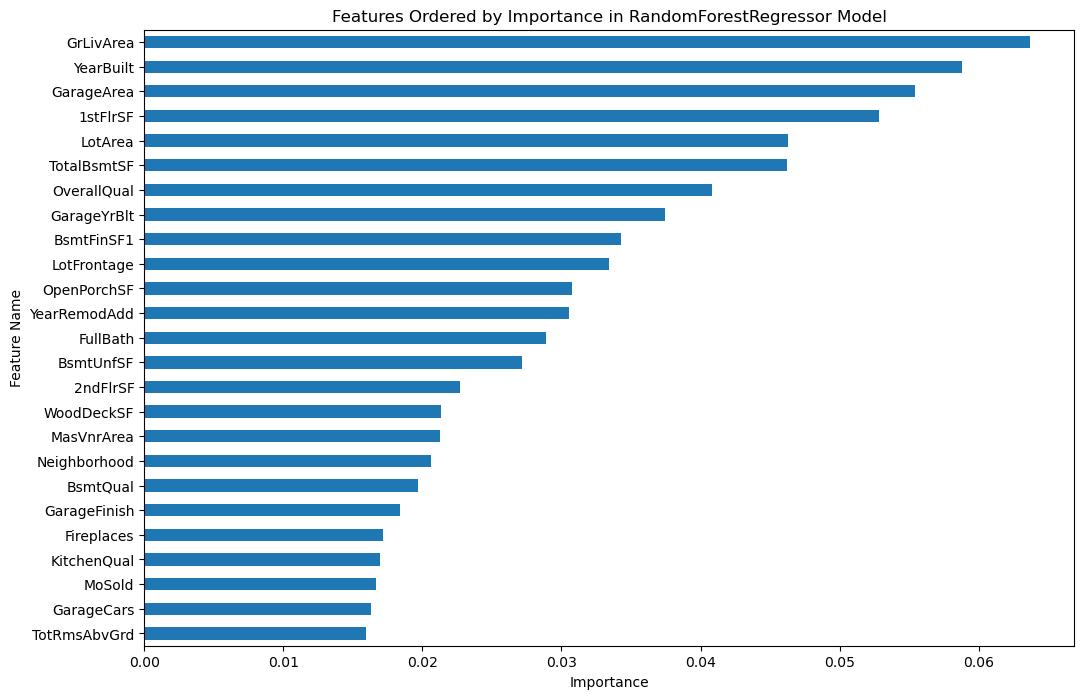

In [22]:
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.title(f'Features Ordered by Importance in RandomForestRegressor Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis() 